In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
dataset = pd.read_csv('online_shoppers_intention (1).csv')

In [4]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Preprocessing

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [6]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
dataset.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [8]:
dups = dataset.duplicated()
print("Number of duplicates rows = %d" %(dups.sum()))
dataset[dups]

Number of duplicates rows = 125


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


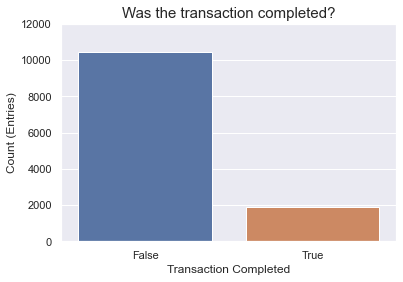

In [9]:
sns.countplot(dataset['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)

plt.show()

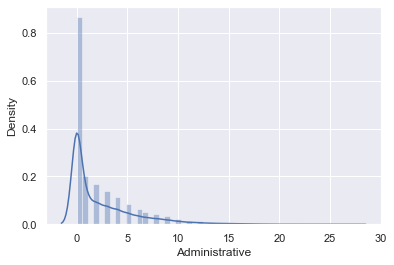

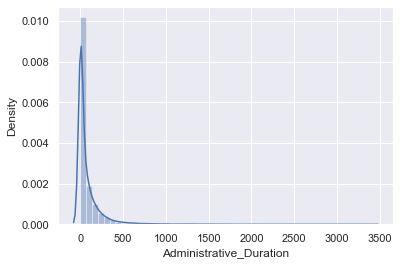

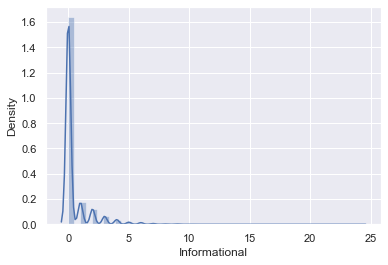

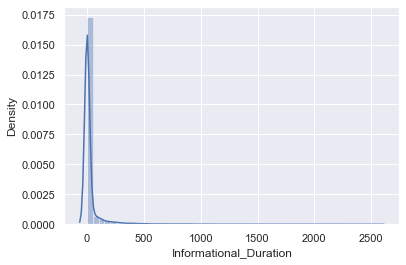

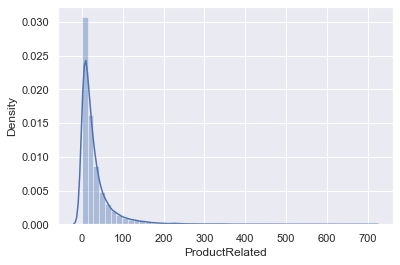

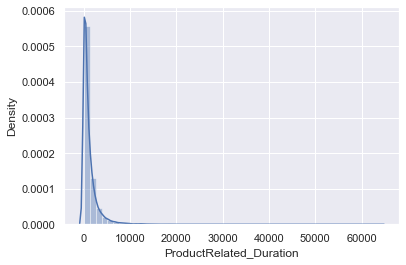

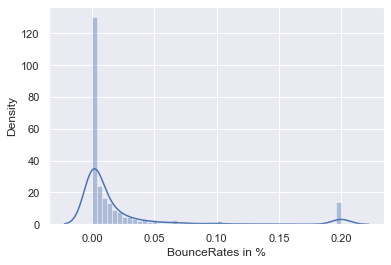

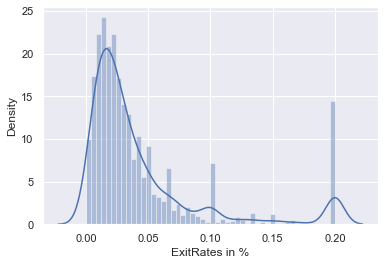

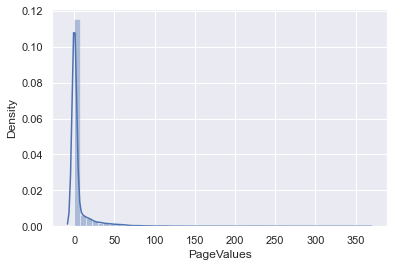

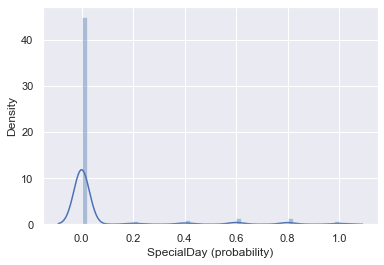

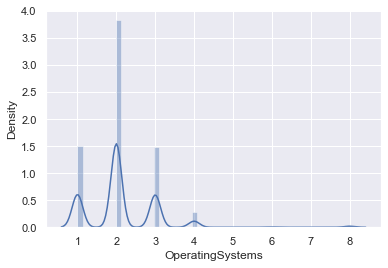

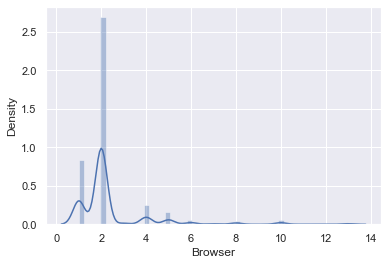

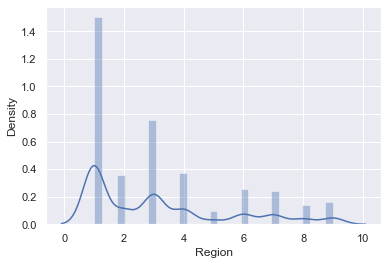

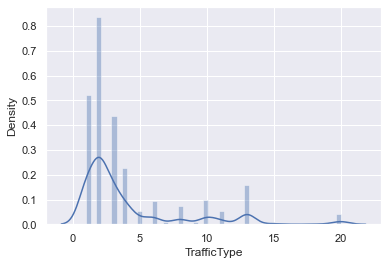

In [10]:
def distplots(col):
    sns.distplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object','bool']).columns)[0:]:
    distplots(i)

In [11]:
dataset[["Weekend","Revenue"]] = dataset[["Weekend","Revenue"]].astype(int)

In [12]:
data_imb = dataset.iloc[:,0:17]
target_imb = dataset.iloc[:,-1]

In [13]:
data_imb.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1


In [14]:
target_imb.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [15]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
df, y = over.fit_resample(data_imb,target_imb)

In [16]:
print(y.value_counts())
print(df.shape, y.shape)
print(data_imb.shape, target_imb.shape)

0    10422
1    10422
Name: Revenue, dtype: int64
(20844, 17) (20844,)
(12330, 17) (12330,)


In [17]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1


In [18]:
dummies = pd.get_dummies(df[['VisitorType','Month']],
                         columns=['VisitorType','Month'],
                         prefix=['VisitorType','Month'],
                         drop_first=True)

In [19]:
dummies.head()

,VisitorType_Other,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,1,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0


In [20]:
df = df.drop(['VisitorType','Month'],axis=1)

In [21]:
final_df = pd.concat([df,dummies],axis=1)

In [22]:
final_df.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,1,0,1,0,0,0,0,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,1,0,1,0,0,0,0,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,1,0,1,0,0,0,0,0,0,0


In [23]:
#sns.heatmap(final_df,annot = True,cmap='coolwarm')

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [25]:
sc_x = StandardScaler()
x_fs_stand = sc_x.fit_transform(df)

In [26]:
x_fs_stand

array([[-0.78228482, -0.5079112 , -0.44789064, ..., -0.88602134,
        -0.76406528, -0.57432186],
       [-0.78228482, -0.5079112 , -0.44789064, ..., -0.88602134,
        -0.51408605, -0.57432186],
       [-0.78228482, -0.5079112 , -0.44789064, ...,  2.44068833,
        -0.26410682, -0.57432186],
       ...,
       [-0.49848106, -0.5079112 , -0.44789064, ...,  1.19317221,
        -0.01412759, -0.57432186],
       [-0.49848106, -0.48536637, -0.44789064, ..., -0.88602134,
         0.23585164,  1.74118393],
       [-0.78228482, -0.5079112 , -0.44789064, ..., -0.88602134,
        -0.76406528,  1.74118393]])

In [50]:
# Splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_fs_stand, y, test_size=0.20, random_state=101)

In [28]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [29]:


dataset['VisitorType'] = dataset['VisitorType'].astype('category')
dataset['VisitorType'] = dataset['VisitorType'].cat.codes

In [30]:
dataset['Month'] = dataset['Month'].astype('category')
dataset['Month'] = dataset['Month'].cat.codes

<AxesSubplot:>

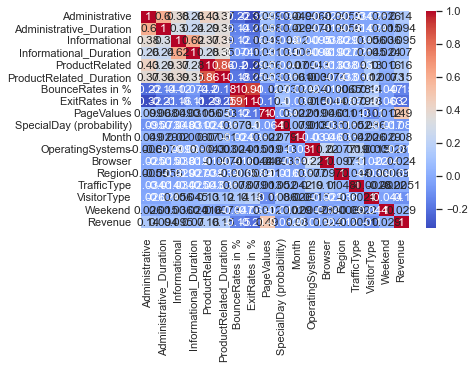

In [31]:
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')

In [32]:
from pandas_profiling import ProfileReport

report = ProfileReport(dataset)
report.to_file(output_file='customerintention.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Building

## 1. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr_predict = lr.predict(X_test)
lr_test = lr.score(X_test,y_test)

lr_train = lr.score(X_train,y_train)

print(classification_report(y_test , y_lr_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      2112
           1       0.87      0.75      0.81      2057

    accuracy                           0.82      4169
   macro avg       0.83      0.82      0.82      4169
weighted avg       0.83      0.82      0.82      4169



In [52]:
print(lr_train)
print(lr_test)

0.8218290854572714
0.8210602062844807


## 2. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_clf_predict = clf.predict(X_test)
clf_test = clf.score(X_test,y_test)
clf_train = clf.score(X_train,y_train)

print(classification_report(y_test , y_clf_predict))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      2112
           1       0.91      0.99      0.95      2057

    accuracy                           0.95      4169
   macro avg       0.95      0.95      0.95      4169
weighted avg       0.95      0.95      0.95      4169



In [54]:
print(clf_train)
print(clf_test)

1.0
0.9481890141520748


<AxesSubplot:>

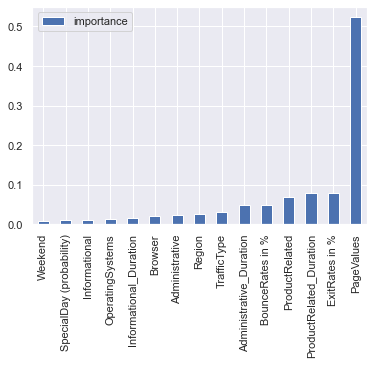

In [37]:
clf.feature_importances_
feature_importance = pd.DataFrame({'importance': clf.feature_importances_}, index= df.columns).sort_values('importance')
feature_importance.plot.bar()

## 3.Random Forest



In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_rfc_predict = rfc.predict(X_test)
print(classification_report(y_test , y_rfc_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2112
           1       0.93      1.00      0.96      2057

    accuracy                           0.96      4169
   macro avg       0.96      0.96      0.96      4169
weighted avg       0.96      0.96      0.96      4169



In [56]:
rf_test = rfc.score(X_test,y_test)
rf_train = rfc.score(X_train,y_train)
print(rf_train)
print(rf_test)

1.0
0.9621012233149436


In [57]:
print(confusion_matrix(y_test , y_rfc_predict))

[[1957  155]
 [   3 2054]]


In [40]:
rfc.feature_importances_

array([0.04194002, 0.05433476, 0.01574012, 0.02430381, 0.07966193,
       0.09486349, 0.05902225, 0.10014676, 0.4085528 , 0.00861609,
       0.01777128, 0.01959775, 0.03093473, 0.03501967, 0.00949455])

<AxesSubplot:>

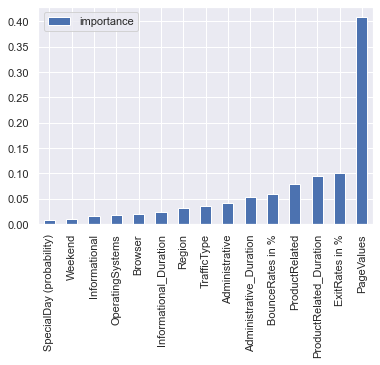

In [41]:
feature_importance = pd.DataFrame({'importance': rfc.feature_importances_}, index= df.columns).sort_values('importance')
feature_importance.plot.bar()

## 3. XGBoost

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02)
xgb.fit(X_train, y_train)
y_xgb_predict = xgb.predict(X_test)
xgb_train =  xgb.score(X_train, y_train)
xgb_test = xgb.score(X_test, y_test)

print(classification_report(y_test , y_xgb_predict))
print(confusion_matrix(y_test , y_xgb_predict))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2112
           1       0.91      0.98      0.94      2057

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.95      0.94      0.94      4169

[[1923  189]
 [  48 2009]]


In [43]:
print(xgb_train)
print(xgb_test)

0.9889008234872897
0.9379270242767844


In [44]:
xgb.feature_importances_

array([0.0397406 , 0.04041248, 0.03587387, 0.03254273, 0.04766693,
       0.04077094, 0.04250868, 0.04037043, 0.35640267, 0.13384065,
       0.0379247 , 0.03633968, 0.03725671, 0.04695148, 0.03139741],
      dtype=float32)

<AxesSubplot:>

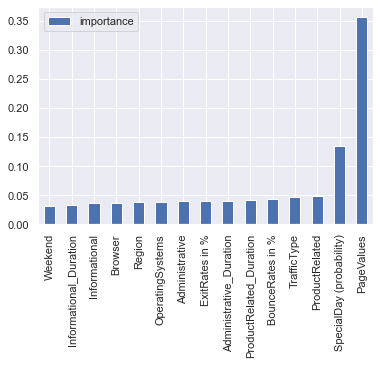

In [45]:
feature_importance = pd.DataFrame({'importance': xgb.feature_importances_}, index= df.columns).sort_values('importance')
feature_importance.plot.bar()

## SUMMARY

In [46]:
data = {'Algorithms':['LogisticRegression','DecisionTree' , 'RandomForestClassifier','XGBClassifier'], 
        'Train':[lr_train,clf_train,rf_train, xgb_train],
       'Test':[lr_test,clf_test,rf_test, xgb_test]}
 

a = pd.DataFrame(data)
 
    
print(a)

               Algorithms     Train      Test
0      LogisticRegression  0.824132  0.819014
1            DecisionTree  1.000000  0.939526
2  RandomForestClassifier  1.000000  0.954063
3           XGBClassifier  0.988901  0.937927


## Random Forest Model is best fit and revenue is mostly affected by PageValues